In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_settings_v3 import *

In [86]:
def a2(b,J):
    return 4*(1-b)

def a4(b,J):
    return 4 * (3*J-4*J*b+b**3/3)

def a6(b, J):
    return 6 * (-2J**2 * b + 4*J*b**3/3 - 4*b**5/45)

print(np.nanmax(a2(beta_values, X1).imag))
print(np.nanmin(a2(beta_values, X1).real))
print(np.nanmax(a2(beta_values, X1).real))

print(np.nanmax(a4(beta_values, X1).imag))
print(np.nanmin(a4(beta_values, X1).real))
print(np.nanmax(a4(beta_values, X1).real))

print(np.nanmax(a6(beta_values, X1).imag))
print(np.nanmin(a6(beta_values, X1).real))
print(np.nanmax(a6(beta_values, X1).real))

0.0
0.0
0.5714285714285716
0.0
-0.17936840803748244
-2.4491417055294562e-05
0.0
23.0807050911305
26.173107393296018


0.44999993229307417
0.872983346207417


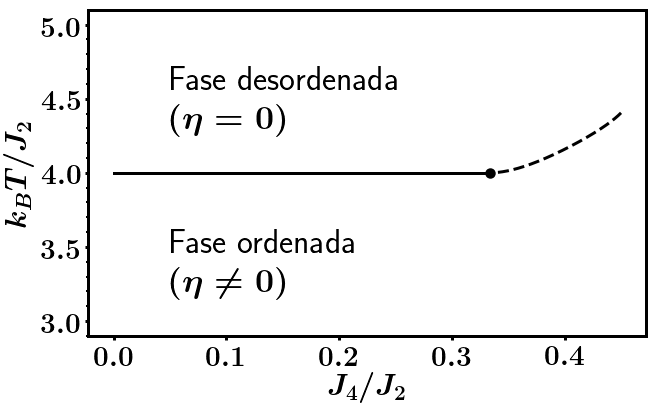

In [97]:
def ineqJ(b):
    return b**3/(3*(4*b-3))

#def f(T):
#    return (-16*T**3 + 5*T**4 + np.sqrt(6/5) * np.sqrt(192*T**5 - 88*T**6 + 6*T**7 + T**8))/(48*(144 - 100*T + 17*T**2))
def f(T):
    return (-8*T**3 + 3*T**4 + 2*np.sqrt(3/5)*np.sqrt(-96*T**5 + 52*T**6 - 7*T**7))/(48*(144 - 92*T + 15*T**2))

def g(b):
    J =  ( 5*b**3 * (-2 + 3*b) + np.sqrt(15)* np.sqrt(-(b-1)*b**5 * (7*b-6)) )/(15*(9 + b*(15*b-23)) )
    if J <= ineqJ(b) or b < np.sqrt(15)-3 or J > 0.45:
        return np.nan
    return J

#def g(b):
#    J = (3*b-2)*b**3/(27 - 69*b + 45*b**2) + np.sqrt(((1-b)*(7*b-6)*b**5)/(9 + b*(15*b-23)**2))/np.sqrt(15)
#    return J
#Y1 = np.linspace(3.5, 4, 10000)
#X1 = f(Y1)

beta_values = np.linspace(np.sqrt(15)-3, 1, 10000)
#beta_values = np.linspace(6/7, 1, 10000)
Y1 = 4/beta_values

X1 = np.array([g(b) for b in beta_values])
print(np.nanmax(X1))
print(4/np.nanmax(Y1))

X2 = np.linspace(0, 1/3, 1000)
Y2 = 4*np.ones(1000)


J_values = ineqJ(beta_values)


fig, ax = plt.subplots(figsize=(10,6))

ax.set_xlabel(r'$J_4/J_2$')
ax.set_ylabel(r'$k_B T/J_2$')
ax.set_ylim(2.9, 5.1)
ax.plot(X2, Y2, '-', color='k')
ax.plot(X1, Y1, '--', color='k')
#ax.plot(J_values, Y1)
ax.scatter(1/3, 4, marker='o', s=80, color='k')
ax.text(0.05, 4.3, 'Fase desordenada\n' + r'$(\eta=0)$', fontsize=34)
ax.text(0.05, 3.2, 'Fase ordenada\n' + r'$(\eta\neq0)$', fontsize=34)

plt.savefig('phase_diagram.png')
plt.show()

In [91]:
6/7

0.8571428571428571